In [1]:
import pandas as pd 

In [2]:
new_news=pd.read_csv('Datasets/new_news_v1.csv')

In [3]:
#converting the created date column to datetime for analysis
new_news[['created_date']]=new_news[['created_date']].apply(pd.to_datetime)

In [4]:
#creating a day of week column
new_news['day_of_week']=new_news['created_date'].dt.day_name()

In [5]:
#creating time of the dy categorical column
new_news['time_of_day']=pd.cut(pd.to_timedelta(new_news['created_time']), pd.to_timedelta(['04:00:00','12:00:00','17:00:00','23:59:59']),
          labels=['Morning','Afternoon','Evening']).astype(str).replace('nan','Midnight')

In [6]:
#getting the unique posts in the new_crypto for analysis

new_news_unique=new_news.drop_duplicates(subset=['id'],keep='first',ignore_index=True)
new_news_unique.shape

(3738, 25)

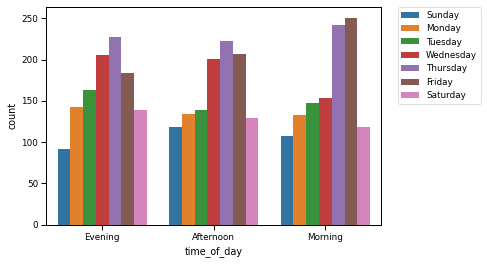

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_context('paper')
plot_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x="time_of_day",data=new_news_unique,hue='day_of_week',hue_order=plot_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
